# Analytics Vidhiya - Janata Hack : Banking

lets read the data and understand it

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
train = pd.read_csv('data/train.csv') 
test = pd.read_csv('data/test.csv')

In [3]:
train_data = train.copy()
test_data = test.copy()

In [4]:
print('Total Entries : {}'.format(train_data.shape[0]))
train_data.isnull().sum()

Total Entries : 164309


Loan_ID                        0
Loan_Amount_Requested          0
Length_Employed             7371
Home_Owner                 25349
Annual_Income              25102
Income_Verified                0
Purpose_Of_Loan                0
Debt_To_Income                 0
Inquiries_Last_6Mo             0
Months_Since_Deliquency    88379
Number_Open_Accounts           0
Total_Accounts                 0
Gender                         0
Interest_Rate                  0
dtype: int64

In [5]:
print('Total Entries : {}'.format(test_data.shape[0]))
test_data.isnull().sum()

Total Entries : 109541


Loan_ID                        0
Loan_Amount_Requested          0
Length_Employed             4936
Home_Owner                 16711
Annual_Income              16898
Income_Verified                0
Purpose_Of_Loan                0
Debt_To_Income                 0
Inquiries_Last_6Mo             0
Months_Since_Deliquency    58859
Number_Open_Accounts           0
Total_Accounts                 0
Gender                         0
dtype: int64

### Preliminary  Treatment

In [6]:
train_data['Loan_Amount_Requested']=train_data['Loan_Amount_Requested'].apply(lambda x:x.replace(',','')).astype(int)

#Feature Engineering
train_data['Loan_To_Income'] = train_data['Loan_Amount_Requested']/train_data['Annual_Income']
train_data['Loan_To_Income'] = train_data['Loan_To_Income'].fillna(99) # 0 would mean it is really good, but since annual income is missing it is bad, businessmen usually take loan to income of 10:1, so we can assume a bad loan to income request as 99:1

train_data['Length_Employed'] = train_data['Length_Employed'].fillna(0)
train_data['Home_Owner'] = train_data['Home_Owner'].fillna('Unknown')
train_data['Annual_Income'] = train_data['Annual_Income'].fillna(0)
train_data['Months_Since_Deliquency'] = train_data['Months_Since_Deliquency'].fillna(0)

In [7]:
test_data['Loan_Amount_Requested']=test_data['Loan_Amount_Requested'].apply(lambda x:x.replace(',','')).astype(int)

#Feature Engineering 
test_data['Loan_To_Income'] = test_data['Loan_Amount_Requested']/test_data['Annual_Income']
test_data['Loan_To_Income'] = test_data['Loan_To_Income'].fillna(99) # 0 would mean it is really good, but since annual income is missing it is bad, businessmen usually take loan to income of 10:1, so we can assume a bad loan to income request as 99:1

test_data['Length_Employed'] = test_data['Length_Employed'].fillna(0)
test_data['Home_Owner'] = test_data['Home_Owner'].fillna('Unknown')
test_data['Annual_Income'] = test_data['Annual_Income'].fillna(0)
test_data['Months_Since_Deliquency'] = test_data['Months_Since_Deliquency'].fillna(0)

In [8]:
train_data.replace({'Length_Employed': { '< 1 year': 0,
                                         '1 year': 1,
                                         '2 years': 2,
                                         '3 years': 3,
                                         '4 years': 4,
                                         '5 years': 5,
                                         '6 years': 6,
                                         '7 years': 7,
                                         '8 years': 8,
                                         '9 years': 9,
                                         '10+ years': 10}},inplace=True)

In [9]:
test_data.replace({'Length_Employed': { '< 1 year': 0,
                                         '1 year': 1,
                                         '2 years': 2,
                                         '3 years': 3,
                                         '4 years': 4,
                                         '5 years': 5,
                                         '6 years': 6,
                                         '7 years': 7,
                                         '8 years': 8,
                                         '9 years': 9,
                                         '10+ years': 10}},inplace=True)

In [10]:
train_data

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate,Loan_To_Income
0,10000001,7000,0,Rent,68000.0,not verified,car,18.37,0,0.0,9,14,Female,1,0.102941
1,10000002,30000,4,Mortgage,0.0,VERIFIED - income,debt_consolidation,14.93,0,17.0,12,24,Female,3,99.000000
2,10000003,24725,7,Mortgage,75566.4,VERIFIED - income source,debt_consolidation,15.88,0,0.0,12,16,Male,3,0.327196
3,10000004,16000,0,Unknown,56160.0,VERIFIED - income source,debt_consolidation,14.34,3,0.0,16,22,Male,3,0.284900
4,10000005,17000,8,Own,96000.0,VERIFIED - income source,debt_consolidation,22.17,1,0.0,19,30,Female,1,0.177083
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164304,10164305,20725,10,Rent,0.0,VERIFIED - income source,credit_card,13.56,0,0.0,13,16,Male,2,99.000000
164305,10164306,6000,8,Own,0.0,VERIFIED - income source,small_business,9.12,0,36.0,13,30,Male,2,99.000000
164306,10164307,20250,10,Mortgage,0.0,VERIFIED - income,credit_card,18.17,1,0.0,17,30,Male,1,99.000000
164307,10164308,10000,4,Rent,0.0,not verified,major_purchase,18.75,1,48.0,16,62,Female,3,99.000000


In [11]:
train_dum = pd.get_dummies(train_data)
test_dum = pd.get_dummies(test_data)

In [12]:
train_dum.drop('Loan_ID',inplace=True,axis=1)
test_dum.drop('Loan_ID',inplace=True,axis=1)

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X = train_dum.drop(['Interest_Rate'],axis=1)
y = train_dum['Interest_Rate'].values

In [15]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=np.random)

# Modeling

In [16]:
from sklearn import metrics

__Decision Tree Classifier__

In [17]:
from sklearn.tree import DecisionTreeClassifier

depths=10
mean_acc=np.zeros((depths))

for i in range(1,depths+1):
    TitanicTree = DecisionTreeClassifier(criterion="entropy", max_depth = i)
    TitanicTree.fit(X_train,y_train)

    yhat = TitanicTree.predict(X_valid)
    mean_acc[i-1] = metrics.accuracy_score(y_valid, yhat)

mean_acc

array([0.44409957, 0.47212586, 0.47586878, 0.49275759, 0.49309233,
       0.49461384, 0.49972613, 0.50450368, 0.50404723, 0.50471669])

__KNN Classifier__

In [46]:
from sklearn.neighbors import KNeighborsClassifier
Ks = 90 #Kstart
Ke = 99 #Kstop
mean_acc = np.zeros((Ke-Ks+1))

c=0
for n in range(Ks,Ke+1):
      
    KNN = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=KNN.predict(X_valid)
    mean_acc[c] = metrics.accuracy_score(y_valid, yhat)
    c+=1

mean_acc

array([0.46923498, 0.46926541, 0.46972187, 0.46890025, 0.46941756,
       0.46880896, 0.4690524 , 0.46877853, 0.46868724, 0.46966101])

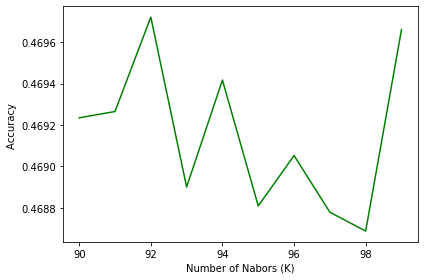

In [47]:
plt.plot(range(Ks,Ke+1),mean_acc,'g')
# plt.fill_between(range(1,Ks+1),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
# plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

__Random Forest Classifier__

In [48]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [49]:
yhat = rf.predict(X_valid)

In [51]:
print(metrics.accuracy_score(y_valid, yhat))
print(metrics.f1_score(y_valid, yhat, average="weighted"))

0.5154585843831782
0.5047872076454506


__Light BGM__

In [52]:
from lightgbm import LGBMClassifier
LGBM = LGBMClassifier(random_state=27, max_depth=6, n_estimators=400)
LGBM.fit(X_train, y_train, categorical_feature=[1, 2, 4, 5, 11])

C:\Users\samla\anaconda3\lib\site-packages\lightgbm\basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [1, 2, 4, 5, 11]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=6,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=400, n_jobs=-1, num_leaves=31, objective=None,
               random_state=27, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [53]:
yhat = LGBM.predict(X_valid)

In [54]:
print(metrics.accuracy_score(y_valid, yhat))
print(metrics.f1_score(y_valid, yhat, average="weighted"))

0.5272655346600937
0.5184590851841636


#### 5. Comparing Acuracy of each model using "train" data

In [55]:
from sklearn.model_selection import cross_val_score
model_accuracy={'accuracy_training':{},'accuracy_valid':{}}

In [59]:
rf.fit(X_train,y_train)
yhat = rf.predict(X_valid)
model_accuracy['accuracy_training']['Random Forest']=cross_val_score(rf,X_train,y_train,scoring='accuracy',cv=5).mean()
model_accuracy['accuracy_valid']['Random Forest']=metrics.accuracy_score(y_valid, yhat)

In [60]:
LGBM.fit(X_train, y_train, categorical_feature=[1, 2, 4, 5, 11])
yhat = rf.predict(X_valid)
model_accuracy['accuracy_training']['LGBM Forest']=cross_val_score(LGBM,X_train,y_train,scoring='accuracy',cv=5).mean()
model_accuracy['accuracy_valid']['LGBM Forest']=metrics.accuracy_score(y_valid, yhat)

C:\Users\samla\anaconda3\lib\site-packages\lightgbm\basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [1, 2, 4, 5, 11]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


In [61]:
pd.DataFrame(model_accuracy)

,accuracy_training,accuracy_valid
Random Forest,0.515424,0.513602
LGBM Forest,0.542021,0.513602


In [63]:
pred_rf = rf.predict(test_dum)
pred_lgbm = LGBM.predict(test_dum)

In [90]:
sol_rf = pd.concat([test['Loan_ID'],pd.Series(pred_rf)],axis=1)
sol_rf.columns = ['Loan_ID','Interest_Rate']
sol_rf.set_index('Loan_ID',inplace=True)

In [92]:
sol_lgbm = pd.concat([test['Loan_ID'],pd.Series(pred_lgbm)],axis=1)
sol_lgbm.columns = ['Loan_ID','Interest_Rate']
sol_lgbm.set_index('Loan_ID',inplace=True)

In [93]:
sol_rf.to_csv('Solution_rf.csv')
sol_lgbm.to_csv('Solution_lgbm.csv')